<a href="https://colab.research.google.com/github/Ian-Sinclair/Computer-Vision-Image-Demosaicing/blob/main/ENCE_4620_1_Project_1_Ian_Sinclair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Liberaries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mp
import PIL as pl
import cv2
from statistics import mean
import math

from google.colab import drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Reading Images

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Load training image

In [ ]:
experimental_images = []

image_path = 'drive/MyDrive/officeBayer (1).png'
experimental_images.append( mp.imread(image_path) )
train = mp.imread( image_path )

image_path = 'drive/MyDrive/onionBayer.png'
experimental_images.append( mp.imread(image_path) )

image_path = 'drive/MyDrive/peppersBayer.png'
experimental_images.append( mp.imread(image_path) )

image_path = 'drive/MyDrive/pearsBayer.png'
experimental_images.append( mp.imread(image_path) )


Load test image

In [ ]:
test_images = []

image_path = 'drive/MyDrive/office_4 (1).jpg'
test_images.append( mp.imread( image_path ) )
test = mp.imread( image_path )

image_path = 'drive/MyDrive/onion.png'
test_images.append( mp.imread( image_path ) )

image_path = 'drive/MyDrive/peppers.png'
test_images.append( mp.imread( image_path ) )

image_path = 'drive/MyDrive/pears.png'
test_images.append( mp.imread( image_path ) )


# Display Image

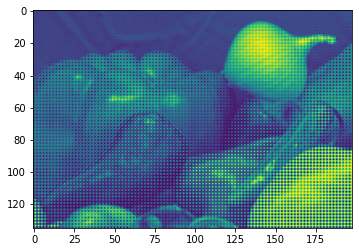

In [ ]:
plt.imshow(experimental_images[1])

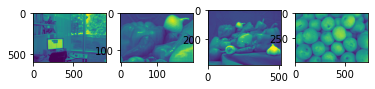

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( experimental_images ))
for i in range( 0 , len( experimental_images )) :
  axs[i].imshow(experimental_images[i])

In [ ]:
test.shape

(600, 903, 3)

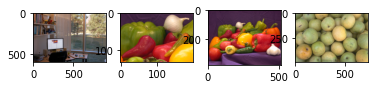

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( test_images ))
for i in range( 0 , len( test_images )) :
  axs[i].imshow( test_images[i] )

# Save Image

In [ ]:
plt.imsave('TrainImage1.png', train)

plt.imsave('testImage1.png', test)

*italicized text*# Image Size

In [ ]:
print("%%%%% Experimental Size %%%%%")
for i in range( 0 , len( experimental_images )) :
  print( experimental_images[i].shape )

print("\n%%%%% Test Size %%%%%")
for i in range( 0 , len( test_images )) :
  print( test_images[i].shape )

print("\n%%%%%%%%%%%%%%%%%%%%%%")

%%%%% Experimental Size %%%%%
(600, 903)
(135, 198)
(384, 512)
(486, 732)

%%%%% Test Size %%%%%
(600, 903, 3)
(135, 198, 3)
(384, 512, 3)
(486, 732, 3)

%%%%%%%%%%%%%%%%%%%%%%


Data Types {color ranges.}

In [ ]:
print("%%%%% Experimental Size %%%%%")
for i in range( 0 , len( experimental_images )) :
  for j in range ( 0 , 10 ) :
    print( experimental_images[i][0][j] )
  print('%%%%%%%%%%%%%%%%%%%%%')

Creating empty image file

In [ ]:
def init_from_bayer_grid( train , test ) :
  Mem = np.zeros(test.shape)

  '''
    0 --> Red
    1 --> Green
    2 --> Blue
  '''

  #  All Blue information.
  for i in range( 0, train.shape[0], 2 ) :
    for j in range( 0, train.shape[1], 2 ) :
      Mem[i][j][2] = train[i][j]

  #  All Red information
  for i in range( 1, train.shape[0], 2 ) :
    for j in range( 1, train.shape[1], 2 ) :
      Mem[i][j][0] = train[i][j]


  #  All Green information
  for i in range( 0,  train.shape[0], 2 ) :
    for j in range( 1, train.shape[1], 2 ) :
      Mem[i][j][1] = train[i][j]

  for i in range( 1,  train.shape[0], 2 ) :
    for j in range( 0, train.shape[1], 2 ) :
      Mem[i][j][1] = train[i][j]
  
  return Mem



Converted image

# Bilinear Interpolation Demosaicing Method 

In [ ]:
def Bilinear_Filter( i : int, j : int, Color : str, target : str, train : list ) :
  valid = ['blue', 'red', 'green', 'vertical', 'horizontal']
  if Color not in valid or target not in valid :
    raise ValueError("results: Color/target must be one of %r." % valid)

  den = 0;
  avg = 0;
  if ( Color == 'blue' or Color == 'red' ) and target == 'green' :
    if i + 1 < train.shape[0] :
      den += 1
      avg += train[i+1][j]
    
    if i - 1 >= 0 :
      den += 1
      avg += train[i-1][j]
    
    if j + 1 < train.shape[1] :
      den += 1
      avg += train[i][j+1]
    
    if j - 1 >= 0 :
      den += 1
      avg += train[i][j-1]
    
    return avg / den

  if ( ( Color == 'blue' or Color == 'red' ) and target != 'green' ) :
    if i + 1 < train.shape[0] :
      if j + 1 < train.shape[1] :
        den += 1
        avg += train[i+1][j+1]
      
      if j - 1 >= 0 :
        den += 1
        avg += train[i+1][j-1]
      
    if i - 1 >= 0 :
      if j + 1 < train.shape[1] :
        den += 1
        avg += train[i-1][j+1]
      
      if j - 1 >= 0 :
        den += 1
        avg += train[i-1][j-1]
    return avg / den


  if Color == 'green' and target == 'vertical' :
    if i + 1 < train.shape[0] :
      den += 1
      avg += train[i+1][j]
    
    if i - 1 >= 0 :
      den += 1
      avg += train[i-1][j]
    
    return avg / den
    
  if Color == 'green' and target == 'horizontal' :
    if j + 1 < train.shape[1] :
      den += 1
      avg += train[i][j+1]
    
    if j - 1 >= 0 :
      den += 1
      avg += train[i][j-1]
    
    return avg / den


In [ ]:
def Bilinear_Interpolation( Bayer_image , train ) :

  Bilinear_Interpolation = []
  Bilinear_Interpolation = Bayer_image.copy()
  #  All Blue pixels.
  for i in range( 0, train.shape[0], 2 ) :
    for j in range( 0, train.shape[1], 2 ) :
      Bilinear_Interpolation[i][j][1] = Bilinear_Filter( i , j , 'blue', 'green', train )
      Bilinear_Interpolation[i][j][0] = Bilinear_Filter( i , j , 'blue', 'red', train )


  #  All Red pixels.
  for i in range( 1, train.shape[0], 2 ) :
    for j in range( 1, train.shape[1], 2 ) :
      Bilinear_Interpolation[i][j][1] = Bilinear_Filter( i , j , 'red', 'green', train )
      Bilinear_Interpolation[i][j][2] = Bilinear_Filter( i , j , 'red', 'blue', train )

  #  All Green information
  for i in range( 0, train.shape[0], 2 ) :
    for j in range( 1, train.shape[1], 2 ) :
      Bilinear_Interpolation[i][j][0] = Bilinear_Filter( i , j , 'green' , 'vertical' , train )
      Bilinear_Interpolation[i][j][2] = Bilinear_Filter( i , j , 'green' , 'horizontal' , train )

  for i in range( 1, train.shape[0], 2 ) :
    for j in range( 0, train.shape[1], 2 ) :
      Bilinear_Interpolation[i][j][0] = Bilinear_Filter( i , j , 'green' , 'horizontal' , train )
      Bilinear_Interpolation[i][j][2] = Bilinear_Filter( i , j , 'green' , 'vertical' , train )
    
  return Bilinear_Interpolation


Final image

In [ ]:
Bayer_Grid_Images = []
for i in range( 0 , len( experimental_images ) ) :
  Bayer_Grid_Images.append( init_from_bayer_grid( experimental_images[i], test_images[i] ) )

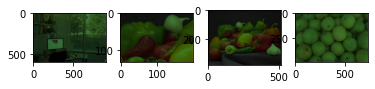

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( Bayer_Grid_Images ))
for i in range( 0 , len( Bayer_Grid_Images )) :
  axs[i].imshow(Bayer_Grid_Images[i])

Bilinear Interpolation

In [ ]:
Bilinear_Interpolated_Images = []
for i in range( 0 , len( Bayer_Grid_Images ) ) :
  Bilinear_Interpolated_Images.append( Bilinear_Interpolation( Bayer_Grid_Images[i] , experimental_images[i] ) )

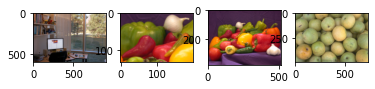

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( Bilinear_Interpolated_Images ))
for i in range( 0 , len( Bilinear_Interpolated_Images )) :
  axs[i].imshow( Bilinear_Interpolated_Images[i] )

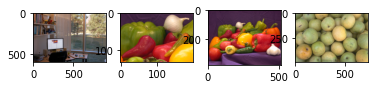

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( test_images ))
for i in range( 0 , len( test_images )) :
  axs[i].imshow( test_images[i] )

Final Result

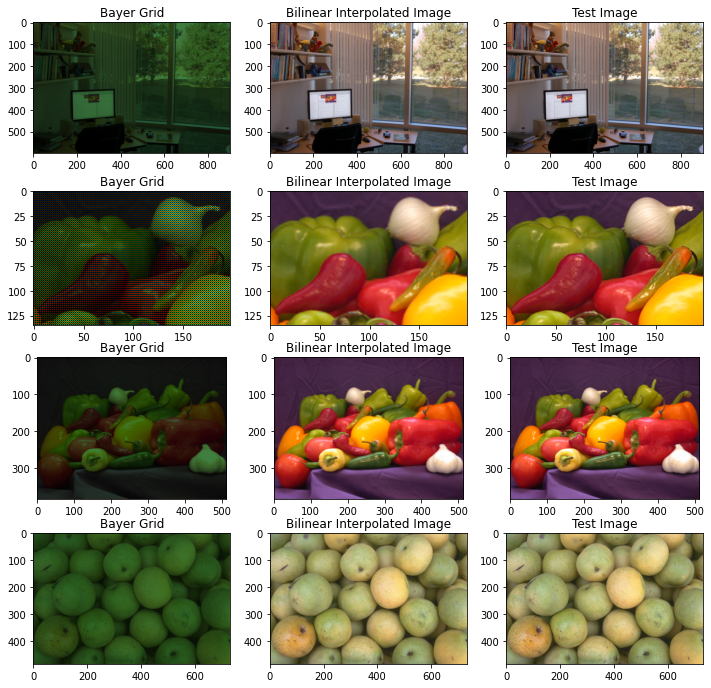

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( test_images ) , 3 , figsize=(12, 12) , )
for i in range( 0 , len( test_images )) :
  axs[i , 0].imshow(Bayer_Grid_Images[i])
  axs[i, 0].set_title('Bayer Grid')
  axs[i , 1].imshow( Bilinear_Interpolated_Images[i] )
  axs[i, 1].set_title('Bilinear Interpolated Image')
  axs[i , 2].imshow( test_images[i] )
  axs[i, 2].set_title('Test Image')
  

# IMPROVED LINEAR INTERPOLATION: gradient-corrected bilinear interpolation

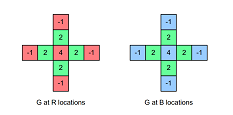

In [ ]:
def G_at_RB ( i , j , train ) :
  filter = [ ( 2,0 ) , ( -2,0 ) , ( 0,2 ) , ( 0,-2 ) ]
  interpolate = [ ( 1,0 ) , ( -1,0 ) , ( 0,1 ) , ( 0,-1 ) ]

  center_weight = 4
  adj_weight = 2
  ext_weight = -1

  num_active = center_weight
  sum = center_weight * train[i][j]

  for p in filter :
    if ( 0 <= i + p[0] < train.shape[0] ) and ( 0 <= j + p[1] < train.shape[1] ) :
      num_active += ext_weight
      sum += ext_weight * train[ i + p[0] ][ j + p[1] ]

  for p in interpolate :
    if ( 0 <= i + p[0] < train.shape[0] ) and ( 0 <= j + p[1] < train.shape[1] ) :
      num_active += adj_weight
      sum += adj_weight * train[ i + p[0] ][ j + p[1] ]

  return sum / num_active


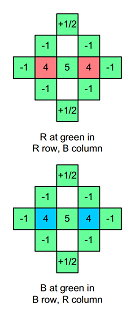

In [ ]:
def BR_at_G_Horizontal( i , j , train ) :
  filter = [ ( 0,2 ) , ( -1,1 ) , ( -1,-1 ) , ( 0,-2 ) , ( 1,-1 ) , ( 1,1 ) ]
  filter2 = [ ( 2,0 ) , ( -2,0 ) ]

  interpolate = [ ( 0,1 ) , ( 0,-1 ) ]

  center_weight = 5
  adj_weight = 4
  ext_weight = -1
  ext_weight2 = 1/2

  
  num_active = center_weight
  sum = center_weight * train[i][j]

  for p in filter :
    if ( 0 <= i + p[0] < train.shape[0] ) and ( 0 <= j + p[1] < train.shape[1] ) :
      num_active += ext_weight
      sum += ext_weight * train[ i + p[0] ][ j + p[1] ]
  
  for p in filter2 :
    if ( 0 <= i + p[0] < train.shape[0] ) and ( 0 <= j + p[1] < train.shape[1] ) :
      num_active += ext_weight2
      sum += ext_weight2 * train[ i + p[0] ][ j + p[1] ]

  for p in interpolate :
    if ( 0 <= i + p[0] < train.shape[0] ) and ( 0 <= j + p[1] < train.shape[1] ) :
      num_active += adj_weight
      sum += adj_weight * train[ i + p[0] ][ j + p[1] ]

  return sum / num_active


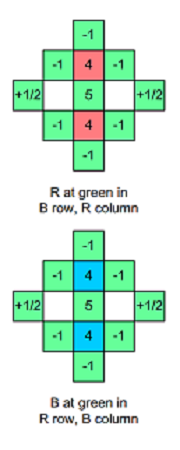

In [ ]:
def BR_at_G_Vertical( i , j , train ) :
  filter = [ ( 2,0 ) , ( -1,1 ) , ( 1,1 ) , ( -2,0 ) , ( 1,-1 ) , ( -1,-1 ) ]
  filter2 = [ ( 0,2 ) , ( 0,-2 ) ]

  interpolate = [ ( 1,0 ) , ( -1,0 ) ]

  center_weight = 5
  adj_weight = 4
  ext_weight = -1
  ext_weight2 = 1/2

  
  num_active = center_weight
  sum = center_weight * train[i][j]

  for p in filter :
    if ( 0 <= i + p[0] < train.shape[0] ) and ( 0 <= j + p[1] < train.shape[1] ) :
      num_active += ext_weight
      sum += ext_weight * train[ i + p[0] ][ j + p[1] ]
  
  for p in filter2 :
    if ( 0 <= i + p[0] < train.shape[0] ) and ( 0 <= j + p[1] < train.shape[1] ) :
      num_active += ext_weight2
      sum += ext_weight2 * train[ i + p[0] ][ j + p[1] ]

  for p in interpolate :
    if ( 0 <= i + p[0] < train.shape[0] ) and ( 0 <= j + p[1] < train.shape[1] ) :
      num_active += adj_weight
      sum += adj_weight * train[ i + p[0] ][ j + p[1] ]

  return sum / num_active

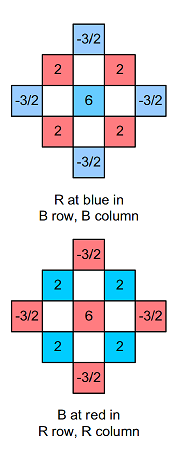

In [ ]:
def BR_at_RB ( i , j , train ) :
  filter = [ ( 2,0 ) , ( 0,2 ) , ( -2,0 ) , ( 0,-2 ) ]

  interpolate = [ ( 1,1 ) , ( -1,1 ) , ( -1,-1 ) , ( 1,-1 ) ]

  center_weight = 6
  adj_weight = 2
  ext_weight = -3/2

  num_active = center_weight
  sum = center_weight * train[i][j]
  for p in filter :
    if ( 0 <= i + p[0] < train.shape[0] ) and ( 0 <= j + p[1] < train.shape[1] ) :
      num_active += ext_weight
      sum += ext_weight * train[ i + p[0] ][ j + p[1] ]

  for p in interpolate :
    if ( 0 <= i + p[0] < train.shape[0] ) and ( 0 <= j + p[1] < train.shape[1] ) :
      num_active += adj_weight
      sum += adj_weight * train[ i + p[0] ][ j + p[1] ]

  return sum / num_active

In [ ]:
def Gradient_corrected_Bilinear_Interpolation ( Bayer_image , train ) :
  Grad_Interpolation = []
  Grad_Interpolation = Bayer_image.copy()

  '''
    0 --> Red
    1 --> Green
    2 --> Blue
  '''

  #  All Blue pixels.
  for i in range( 0, train.shape[0], 2 ) :
    for j in range( 0, train.shape[1], 2 ) :
      Grad_Interpolation[i][j][1] = G_at_RB( i , j , train )
      Grad_Interpolation[i][j][0] = BR_at_RB( i , j , train )


  #  All Red pixels.
  for i in range( 1, train.shape[0], 2 ) :
    for j in range( 1, train.shape[1], 2 ) :
      Grad_Interpolation[i][j][1] = G_at_RB( i , j , train )
      Grad_Interpolation[i][j][2] = BR_at_RB( i , j , train )

  #  All Green information
  for i in range( 0, train.shape[0], 2 ) :
    for j in range( 1, train.shape[1], 2 ) :
      Grad_Interpolation[i][j][0] = BR_at_G_Vertical( i , j , train )
      Grad_Interpolation[i][j][2] = BR_at_G_Horizontal( i , j , train )

  for i in range( 1, train.shape[0], 2 ) :
    for j in range( 0, train.shape[1], 2 ) :
      Grad_Interpolation[i][j][0] = BR_at_G_Horizontal( i , j , train )
      Grad_Interpolation[i][j][2] = BR_at_G_Vertical( i , j , train )

  return Grad_Interpolation


In [ ]:
Bayer_Grid_Images = []
for i in range( 0 , len( experimental_images ) ) :
  Bayer_Grid_Images.append( init_from_bayer_grid( experimental_images[i], test_images[i] ) )

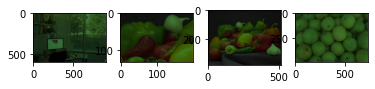

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( Bayer_Grid_Images ))
for i in range( 0 , len( Bayer_Grid_Images )) :
  axs[i].imshow(Bayer_Grid_Images[i])

In [ ]:
Grad_Corrected_Bilinear_Interpolated_Images = []
for i in range( 0 , len( Bayer_Grid_Images ) ) :
  Grad_Corrected_Bilinear_Interpolated_Images.append( Gradient_corrected_Bilinear_Interpolation( Bayer_Grid_Images[i] , experimental_images[i] ) )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


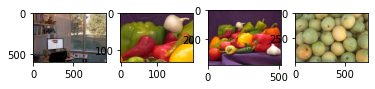

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( Grad_Corrected_Bilinear_Interpolated_Images ))
for i in range( 0 , len( Grad_Corrected_Bilinear_Interpolated_Images )) :
  axs[i].imshow( Grad_Corrected_Bilinear_Interpolated_Images[i] )

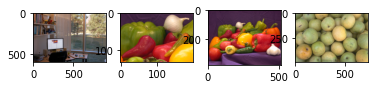

In [ ]:
%matplotlib inline
fig, axs = plt.subplots(1, len( test_images ))
for i in range( 0 , len( test_images )) :
  axs[i].imshow( test_images[i] )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


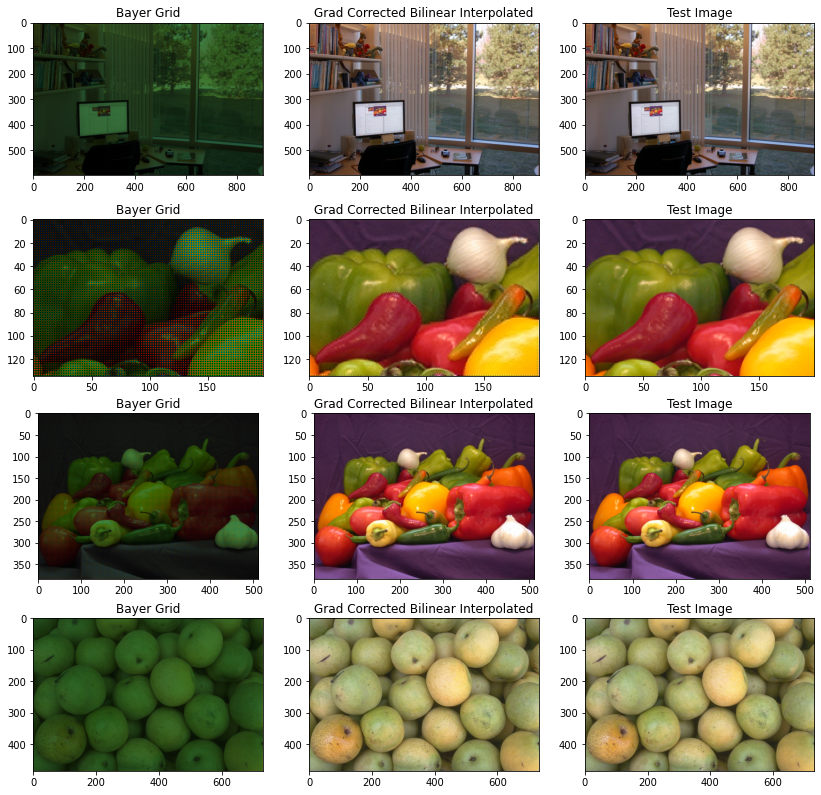

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( test_images ) , 3 , figsize=(14, 14) , )
for i in range( 0 , len( test_images )) :
  axs[i , 0].imshow(Bayer_Grid_Images[i])
  axs[i, 0].set_title('Bayer Grid')
  axs[i , 1].imshow( Grad_Corrected_Bilinear_Interpolated_Images[i] )
  axs[i, 1].set_title('Grad Corrected Bilinear Interpolated')
  axs[i , 2].imshow( test_images[i] )
  axs[i, 2].set_title('Test Image')
  

# Performance

Converting test rggb (0,255) to (0,1) scale.

In [ ]:
def con_255_01 ( test ) :
  validate = np.zeros(test.shape)
  for i in range(0 , test.shape[0]) :
    for j in range(0 , test.shape[1]) :
      for k in range(0 , test.shape[2]) :
        validate[i][j][k] = test[i][j][k]/255

  return validate

Root mean square error

In [ ]:
def MSE( train , test ) :
  num_elements = 0
  sum = 0
  for i in range(0 , test.shape[0]) :
    for j in range(0 , test.shape[1]) :
      for k in range(0 , test.shape[2]) :
        num_elements += 1
        sum += ( train[i][j][k] - test[i][j][k] ) ** 2
  return sum / num_elements



In [ ]:
def MSE_RGB ( train ,test ) :
  num_elements = 0
  sum_blue = 0
  sum_red = 0
  sum_green = 0

  for i in range(0 , test.shape[0]) :
    for j in range(0 , test.shape[1]) :
      num_elements += 1
      sum_red += ( train[i][j][0] - test[i][j][0] )**2
      sum_green += ( train[i][j][1] - test[i][j][1] )**2
      sum_blue += ( train[i][j][2] - test[i][j][2] )**2
  
  return sum_red / num_elements, sum_green / num_elements , sum_blue / num_elements

In [ ]:
def PSNR ( MSE , test ) :
  R = 0
  sum = []
  for j in test :
    for k in j :
      sum.append( mean(k) )
  if mean( sum ) > 1 :
    R = 255
  else :
    R = 1

  return  10*math.log10(float(R**2 / MSE))

Convert test images to correct scale.

In [ ]:
validate = []
for i in range( 0 , len( test_images ) ) :
  sum = []
  for j in test_images[i] :
    for k in j :
      sum.append( mean(k) )
  if mean( sum ) > 1 :
    validate.append( con_255_01( test_images[i] ) )
  else :
    validate.append( test_images[i] )

Bilinear Interpolation RMSE

In [ ]:
Bilinear_Interpolation_MSE = []
Bilinear_Interpolation_PSNR = []
Bilinear_Interpolation_MSE_RGB = []
for i in range ( 0 , len( Bilinear_Interpolated_Images )) :
  Bilinear_Interpolation_MSE.append( MSE( Bilinear_Interpolated_Images[i] , validate[i] ) )
  Bilinear_Interpolation_MSE_RGB.append( MSE_RGB( Bilinear_Interpolated_Images[i] , validate[i] ) )

for i in range ( 0 , len ( Bilinear_Interpolation_MSE )) :
  Bilinear_Interpolation_PSNR.append( PSNR( Bilinear_Interpolation_MSE[i] , validate[i] ) )

In [ ]:
for i in Bilinear_Interpolation_MSE :
  print(i)

0.000837433603092783
0.00036184625921235165
0.00020057589663090752
0.00017680151193279057


In [ ]:
print( mean( Bilinear_Interpolation_MSE ) )

0.0003941643177172082


Gradient-corrected bilinear interpolation RMSE

In [ ]:
Grad_Corrected_Bilinear_Interpolation_MSE = []
Grad_Corrected_Bilinear_Interpolation_PSNR = []
Grad_Corrected_Bilinear_Interpolation_MSE_RGB = []
for i in range ( 0 , len( Grad_Corrected_Bilinear_Interpolated_Images )) :
  Grad_Corrected_Bilinear_Interpolation_MSE.append( MSE( Grad_Corrected_Bilinear_Interpolated_Images[i] , validate[i] ) )
  Grad_Corrected_Bilinear_Interpolation_PSNR.append( PSNR(Grad_Corrected_Bilinear_Interpolation_MSE[-1] , validate[i] ))
  Grad_Corrected_Bilinear_Interpolation_MSE_RGB.append( MSE_RGB( Grad_Corrected_Bilinear_Interpolated_Images[i] , validate[i] )  )

In [ ]:
for i in Grad_Corrected_Bilinear_Interpolation_MSE :
  print(i)

0.0005273017465026373
0.0005520324605190031
0.00020687557200003908
6.237489616639636e-05


In [ ]:
print( mean( Grad_Corrected_Bilinear_Interpolation_MSE ) )

0.0003371461687970189


# Comparison

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


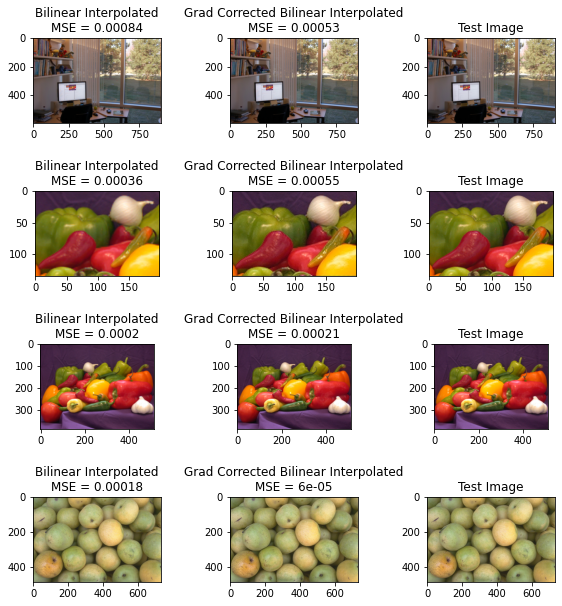

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( test_images ) , 3 , figsize=( 10, 10) )
fig.subplots_adjust(hspace = 0.8)
for i in range( 0 , len( test_images )) :
  axs[i , 0].imshow(Bilinear_Interpolated_Images[i])
  axs[i, 0].set_title('Bilinear Interpolated' + '\nMSE = ' + str(round(Bilinear_Interpolation_MSE[i], 5)))
  axs[i , 1].imshow( Grad_Corrected_Bilinear_Interpolated_Images[i] )
  axs[i, 1].set_title('Grad Corrected Bilinear Interpolated' + '\nMSE = ' + str(round(Grad_Corrected_Bilinear_Interpolation_MSE[i], 5)))
  axs[i , 2].imshow( test_images[i] )
  axs[i, 2].set_title('Test Image')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


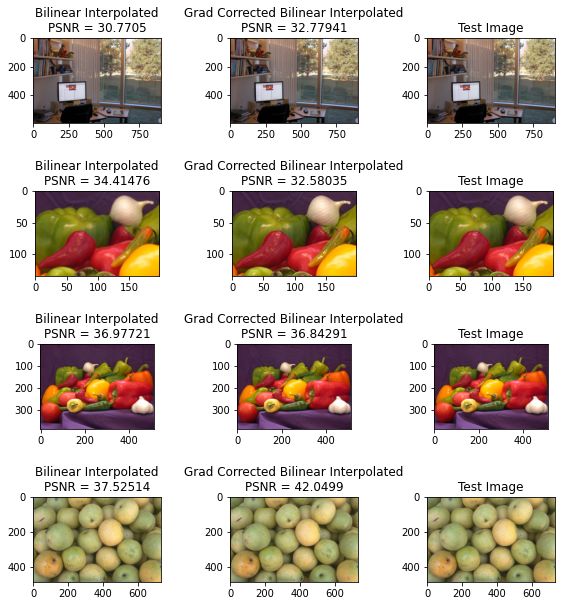

In [ ]:
%matplotlib inline
fig, axs = plt.subplots( len( test_images ) , 3 , figsize=( 10, 10) )
fig.subplots_adjust(hspace = 0.8)
for i in range( 0 , len( test_images )) :
  axs[i , 0].imshow(Bilinear_Interpolated_Images[i])
  axs[i, 0].set_title('Bilinear Interpolated' + '\nPSNR = ' + str(round(Bilinear_Interpolation_PSNR[i], 5)))
  axs[i , 1].imshow( Grad_Corrected_Bilinear_Interpolated_Images[i] )
  axs[i, 1].set_title('Grad Corrected Bilinear Interpolated' + '\nPSNR = ' + str(round(Grad_Corrected_Bilinear_Interpolation_PSNR[i], 5)))
  axs[i , 2].imshow( test_images[i] )
  axs[i, 2].set_title('Test Image')

In [ ]:
print(Grad_Corrected_Bilinear_Interpolation_MSE_RGB)

[(0.0004941627303428923, 0.00041385114256755647, 0.0006738913665968849), (0.0006898237339268695, 0.00019696822895036206, 0.0007693054186797784), (0.00025081138401769165, 9.240057687543843e-05, 0.0002774147551067394), (7.661073188828912e-05, 3.1170487079493995e-05, 7.934346953154058e-05)]


In [ ]:
print(Bilinear_Interpolation_MSE_RGB)

[(0.0007690843983595956, 0.0005464894514909402, 0.0011967269594271902), (0.0004256223806679603, 0.00019829904517735893, 0.0004616173517918184), (0.00024361060847087192, 0.00010010263601626567, 0.00025801444540541105), (0.00020690110178940186, 9.648115496885672e-05, 0.00022702227904025042)]
